### **LÀM THẾ NÀO ĐỂ ÁP DỤNG CANNY CHO CÁC VIDEO?**

*trả lời câu hỏi theo yêu cầu đề bài ở trong Lab3\assets\images\bai_tap.png*

## Làm thế nào để áp dụng Canny cho các video?
 Video là một chuỗi các ảnh (frame) liên tiếp theo thời gian.
Do đó, để áp dụng Canny cho video, ta xử lý mỗi frame như một ảnh tĩnh.

#### Bước 1 – Mở video
  Sử dụng OpenCV để mở video từ file hoặc webcam.


In [53]:
import cv2

cap = cv2.VideoCapture(r"C:\Users\PC\Downloads\nobita.mp4")


#### Bước 2 – Đọc từng frame của video
Video được đọc từng frame một trong vòng lặp.
Mỗi frame sẽ được xử lý độc lập.


In [54]:
ret, frame = cap.read()


#### Bước 3 – Chuyển frame sang ảnh xám
Canny chỉ hoạt động trên ảnh xám,
vì vậy mỗi frame màu cần được chuyển sang grayscale.


In [55]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#### Bước 4 – Giảm nhiễu cho frame
Làm mượt ảnh giúp giảm nhiễu và hạn chế các cạnh giả
trước khi phát hiện biên.


In [56]:
blur = cv2.GaussianBlur(gray, (5, 5), 1.4)


#### Bước 5 – Áp dụng thuật toán Canny
Thuật toán Canny được áp dụng cho từng frame
để phát hiện các cạnh trong video.


In [57]:
edges = cv2.Canny(blur, 50, 150)


#### Bước 6 – Minh họa kết quả trong Jupyter Notebook
Do hạn chế của Jupyter Notebook trong việc hiển thị video realtime,
kết quả được minh họa bằng một số frame đại diện của video.


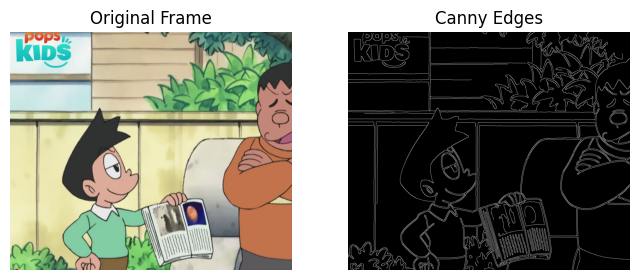

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Original Frame")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.show()


#### Bước 7 – Xử lý toàn bộ video và lưu kết quả
Toàn bộ video được xử lý frame-by-frame bằng thuật toán Canny
và kết quả được lưu ra một video mới để quan sát.


In [59]:
import cv2

cap = cv2.VideoCapture(r"C:\Users\PC\Downloads\nobita.mp4")

# FPS an toàn
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 25

width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter(
    r"C:\Users\PC\Downloads\nobita_canny.avi",
    fourcc,
    fps,
    (width, height),
    True   # xuất video màu (3 kênh)
)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 1.4)
    edges = cv2.Canny(blur, 50, 150)

    # chuyển cạnh sang BGR để ghi video màu
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    out.write(edges_bgr)

cap.release()
out.release()


Do sự khác biệt về codec và định dạng video,
kết quả được xuất dưới dạng video màu với codec phổ biến
để đảm bảo khả năng tương thích khi phát.
